# 5.3.2 非線形最小二乗法のサンプルコード

In [1]:
import numpy as np

### コード5.5: 非線形最小二乗問題の作成

In [3]:
from code5_3 import * # Gauss-Newton法のコードを読み込み
from code5_4 import * # Huschens法のコードを読み込み 

In [4]:
# データの生成
t = np.linspace(0, 10, 20)  # tの範囲とデータ数
true_x = np.array([2, -0.5, 1, -0.1])  # 真のパラメータ x1, x2, x3, x4
def func(x): #モデル関数を定義
    return x[0] * np.exp(x[1] * t) + x[2] * np.exp(x[3] * t)
# ヤコビアン行列の計算
def jac(x):
    x1, x2, x3, x4 = x
    J = np.zeros((t.size, len(x)))
    J[:, 0] = np.exp(x2 * t)           # ∂f/∂x1
    J[:, 1] = x1 * t * np.exp(x2 * t)   # ∂f/∂x2
    J[:, 2] = np.exp(x4 * t)           # ∂f/∂x3
    J[:, 3] = x3 * t * np.exp(x4 * t)   # ∂f/∂x4
    return - J
np.random.seed(0)  # 再現性のためシードを固定
b = func(true_x) + np.random.normal(0, 0.2, len(t))  # ノイズを加えたデータ
def r_func(x):
    return b - func(x)
# 問題を解く
x_0 = 0.9*true_x  # 初期推定値 x1, x2, x3, x4
GN_x =gauss_newton(r_func, jac, x_0)
Hu_x = Huschens(r_func, jac, x_0)

GN, iter: 28 ||r(x_k)||: 0.6874584912036877
Huschens, iter: 16 ||r(x_k)||: 0.6874584912027416


Text(0.5, 1.0, '非線形最小二乗問題')

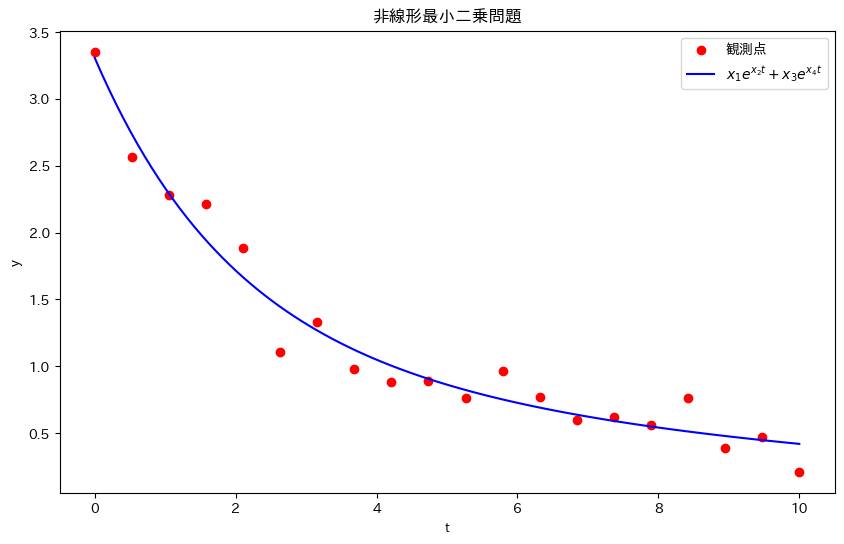

In [5]:
# フィッティング結果のプロット（本には未掲載）
%matplotlib inline
import matplotlib.pyplot as plt
import japanize_matplotlib 
t_fit = np.linspace(0, 10, 100)
def func_plt(x):
    return x[0] * np.exp(x[1] * t_fit) + x[2] * np.exp(x[3] * t_fit)
est_b_fit = func_plt(Hu_x)
# データとフィッティング曲線のプロット
plt.figure(figsize=(10, 6))
plt.scatter(t, b, label='観測点', color='red')
text = r'$x_1e^{x_2t}+x_3e^{x_4t}$'
plt.plot(t_fit, est_b_fit, color='blue', label=text)
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.title("非線形最小二乗問題")